In [39]:
from utils import *
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Define sigma values and run trials
all_gains_and_params = []
for i in range(1, 11):
    sigma_test_value = i / 10
    gains, params = execute_multiple_trials(sigma_test_value)
    all_gains_and_params.append((gains, params))
    print("execute_multiple_trials done for sigma = {0}".format(sigma_test_value))

execute_multiple_trials done for sigma = 0.1
execute_multiple_trials done for sigma = 0.2
execute_multiple_trials done for sigma = 0.3
execute_multiple_trials done for sigma = 0.4
execute_multiple_trials done for sigma = 0.5
execute_multiple_trials done for sigma = 0.6
execute_multiple_trials done for sigma = 0.7
execute_multiple_trials done for sigma = 0.8
execute_multiple_trials done for sigma = 0.9
execute_multiple_trials done for sigma = 1.0


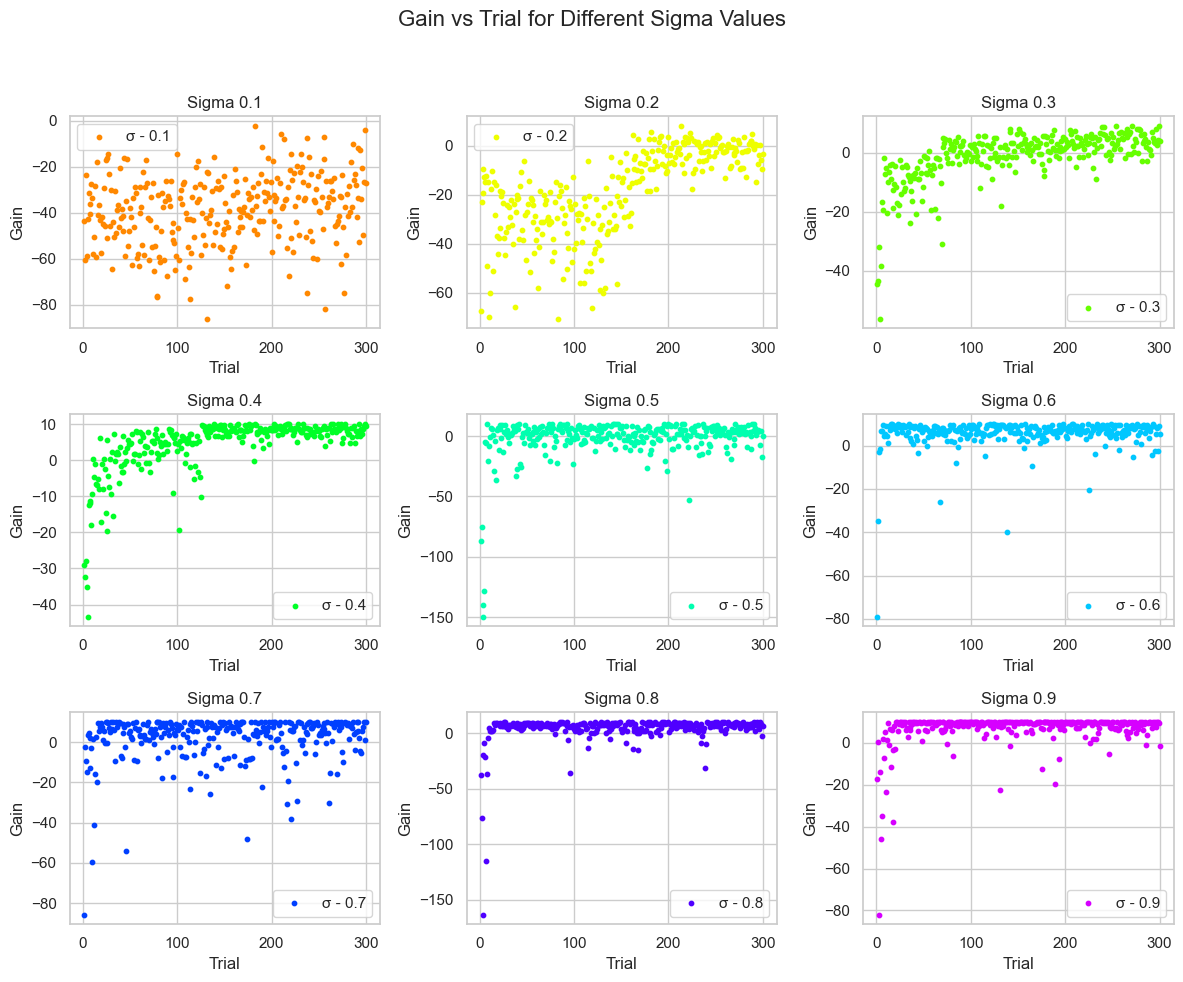

In [40]:

# Plot the results with a different style
fig, axs = plt.subplots(3, 3, figsize=(12, 10))
axs = axs.flatten()
colors = sns.color_palette("hsv", 10)
for i in range(9):
    x_values = range(1, len(all_gains_and_params[i][0]) + 1)
    axs[i].scatter(x_values, all_gains_and_params[i][0], color=colors[i], s=10, label=("σ - " + str((i + 1) / 10)))
    axs[i].legend()
    axs[i].set_xlabel("Trial")
    axs[i].set_ylabel("Gain")
    axs[i].set_title(f"Sigma {round((i + 1) / 10, 1)}")

# Add a main title and adjust layout
fig.suptitle("Gain vs Trial for Different Sigma Values", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

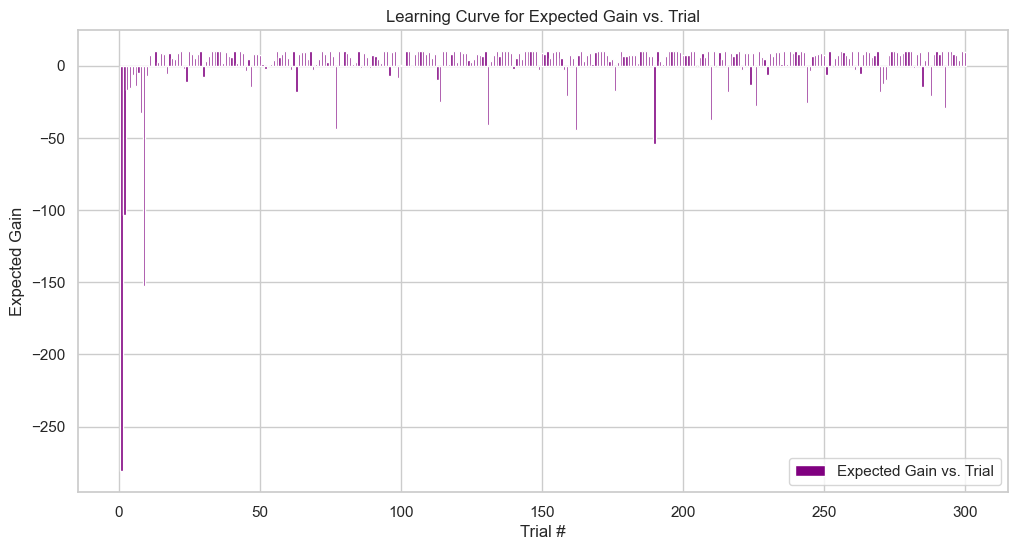

In [41]:

# best sigma value is around 0.8 and 0.9 and we'll plot the learning curve for this sigma
best_sigma = 0.87
gains, params = execute_multiple_trials(best_sigma)

plt.figure(figsize=(12, 6))
plt.bar(range(1, 301), gains, color='purple', label='Expected Gain vs. Trial')
plt.xlabel('Trial #')
plt.ylabel('Expected Gain')
plt.title('Learning Curve for Expected Gain vs. Trial')
plt.legend()
plt.grid(True)
plt.show()

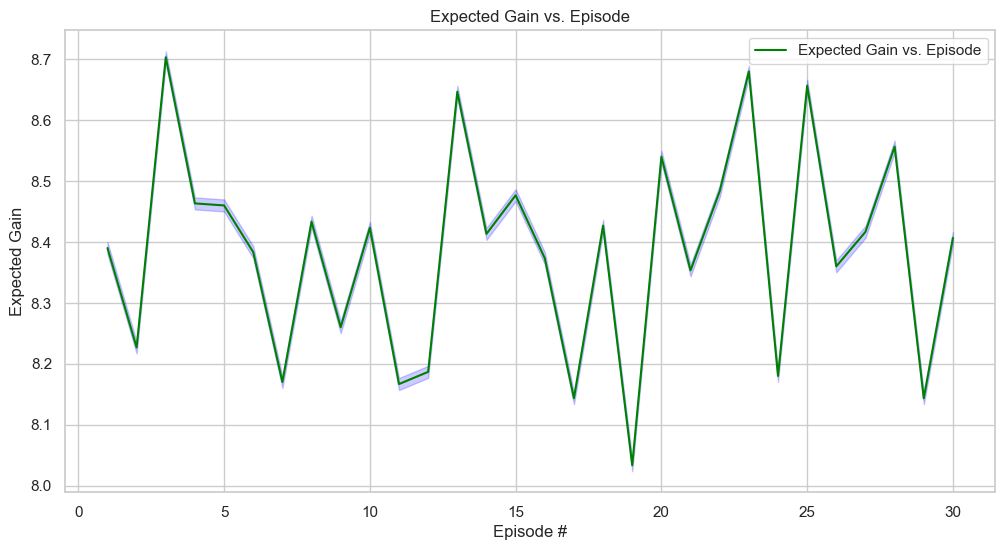

In [42]:


# Get and plot the averaged curve
average_curve = compute_averaged_curve(params, best_sigma, 3000, 300)
num_trials = 300
standard_error = np.std(average_curve) / np.sqrt(num_trials)

plt.figure(figsize=(12, 6))
plt.fill_between(range(1, 31), average_curve - standard_error, average_curve + standard_error, color='blue', alpha=0.2)
plt.plot(range(1, 31), average_curve, color='green', label='Expected Gain vs. Episode')
plt.xlabel('Episode #')
plt.ylabel('Expected Gain')
plt.title('Expected Gain vs. Episode')
plt.legend()
plt.grid(True)
plt.show()


NUMBER OF ITERATIONS TAKEN TO CONVERGE - 29


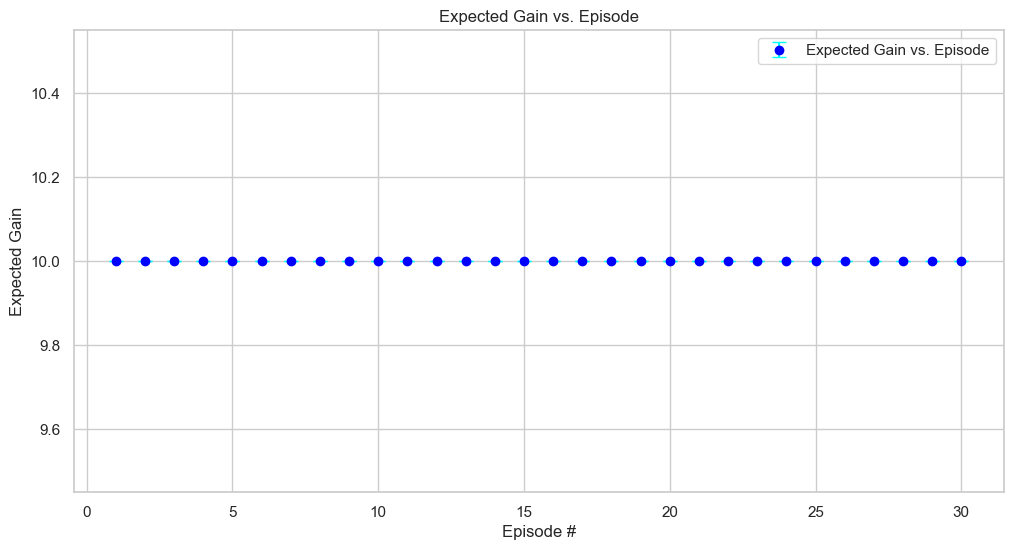

In [43]:



# Perform value iteration and plot results
policy, value_function, iterations = derive_policy_via_value_iteration(0.0000001)
print("NUMBER OF ITERATIONS TAKEN TO CONVERGE - " + str(iterations))
value_iteration_curve = compute_averaged_curve(None, None, 300, 30, policy)
num_trials = 300
standard_error = np.std(value_iteration_curve) / np.sqrt(num_trials)

plt.figure(figsize=(12, 6))
plt.errorbar(range(1, 31), value_iteration_curve, yerr=standard_error, fmt='o', ecolor='cyan', capsize=5, color='blue', label='Expected Gain vs. Episode')
plt.xlabel('Episode #')
plt.ylabel('Expected Gain')
plt.title('Expected Gain vs. Episode')
plt.legend()
plt.grid(True)
plt.show()


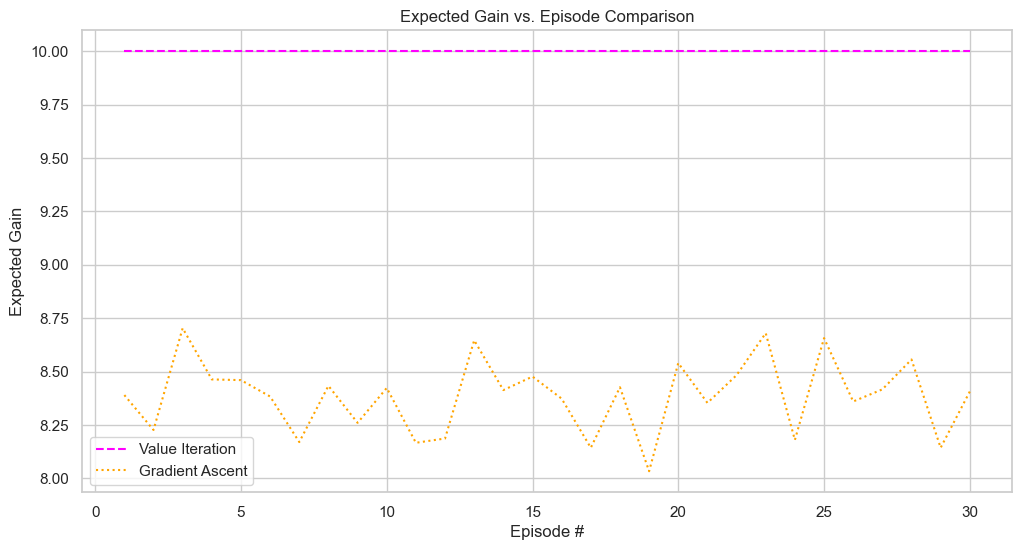

In [44]:

# Compare the value iteration and gradient ascent results
plt.figure(figsize=(12, 6))
plt.plot(range(1, 31), value_iteration_curve, linestyle='--', color='magenta', label='Value Iteration')
plt.plot(range(1, 31), average_curve, linestyle=':', color='orange', label="Gradient Ascent")
plt.xlabel('Episode #')
plt.ylabel('Expected Gain')
plt.title('Expected Gain vs. Episode Comparison')
plt.legend()
plt.grid(True)
plt.show()
